In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("./../../modified_combined.csv")

In [9]:
value_dict = df['heirarchy'].value_counts()

In [11]:
import numpy as np

In [14]:
updated_dict = {}
for k, v in value_dict.items():
    updated_dict[k] = int(np.round(v//3))

In [15]:
updated_dict

{'indian': 368,
 'female': 283,
 'male': 280,
 'american': 269,
 'tall': 238,
 'south': 230,
 'asian': 199,
 'adult': 197,
 'hindu': 196,
 'muslim': 195,
 'white': 195,
 'christian': 194,
 'teenager': 189,
 'jew': 188,
 'child': 187,
 'buddhist': 184,
 'short': 181,
 'black': 173,
 'pierced': 168,
 'latino': 164,
 'muscular': 158,
 'obese': 157,
 'old': 153,
 'middle': 149,
 'skinny': 141,
 'handicapped': 135,
 'down': 132,
 'blind': 99}

In [8]:
len(df)

16209

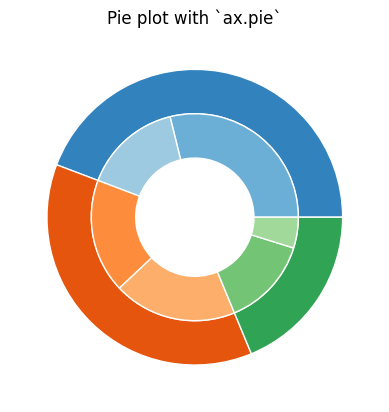

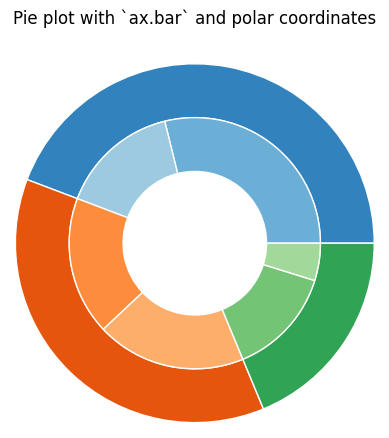

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

###############################################################################
# The most straightforward way to build a pie chart is to use the
# :meth:`pie method <matplotlib.axes.Axes.pie>`
#
# In this case, pie takes values corresponding to counts in a group.
# We'll first generate some fake data, corresponding to three groups.
# In the inner circle, we'll treat each number as belonging to its
# own group. In the outer circle, we'll plot them as members of their
# original 3 groups.
#
# The effect of the donut shape is achieved by setting a `width` to
# the pie's wedges through the `wedgeprops` argument.


fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

###############################################################################
# However, you can accomplish the same output by using a bar plot on
# axes with a polar coordinate system. This may give more flexibility on
# the exact design of the plot.
#
# In this case, we need to map x-values of the bar chart onto radians of
# a circle. The cumulative sum of the values are used as the edges
# of the bars.

fig, ax = plt.subplots(subplot_kw=dict(polar=True))

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])
#normalize vals to 2 pi
valsnorm = vals/np.sum(vals)*2*np.pi
#obtain the ordinates of the bar edges
valsleft = np.cumsum(np.append(0, valsnorm.flatten()[:-1])).reshape(vals.shape)

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.bar(x=valsleft[:, 0],
       width=valsnorm.sum(axis=1), bottom=1-size, height=size,
       color=outer_colors, edgecolor='w', linewidth=1, align="edge")

ax.bar(x=valsleft.flatten(),
       width=valsnorm.flatten(), bottom=1-2*size, height=size,
       color=inner_colors, edgecolor='w', linewidth=1, align="edge")

ax.set(title="Pie plot with `ax.bar` and polar coordinates")
ax.set_axis_off()
plt.show()